In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [23]:
def set_style():
    # This sets reasonable defaults for font size for
    # a figure that will go in a paper
    sns.set_context("paper")
    
    sns.set(rc={'figure.figsize':(11.7,6.27)})
    
    # Set the font to be serif, rather than sans
    sns.set(font='serif')
    
    # Make the background white, and specify the
    # specific font family
    sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
    })
    
    sns.set_theme(style="ticks", palette="pastel")
    

set_style()

In [24]:
def parse_res(file):
    with open(file, 'r') as f:
        lines = f.read().split("\n")
        
    data = []
    for line in lines[1:]:
        if line:
            script, time = line.split()
            data.append([script.replace(".sh:", ""), float(time)])
    
    df = pd.DataFrame(data, columns=["test", "exec_time"])
#     df = df.set_index("test_name")
    return df
parse_res('distr_rep1.res')

,test,exec_time
0,nfa-regex,347.053
1,sort,287.717
2,top-n,271.813
3,wf,272.828
4,spell,445.375
5,diff,1355.698
6,bi-grams,312.372
7,set-diff,114.655
8,sort-sort,369.781
9,shortest-scripts,5.484


In [25]:
modes = ['seq', 'par', 'distr']
reps = ['3']

dfs = []
for mode in modes:
    df = parse_res(f'{mode}_rep3.res')
    df['mode'] = mode
    dfs.append(df)
    
summary = pd.concat(dfs)

<AxesSubplot:xlabel='test', ylabel='exec_time'>

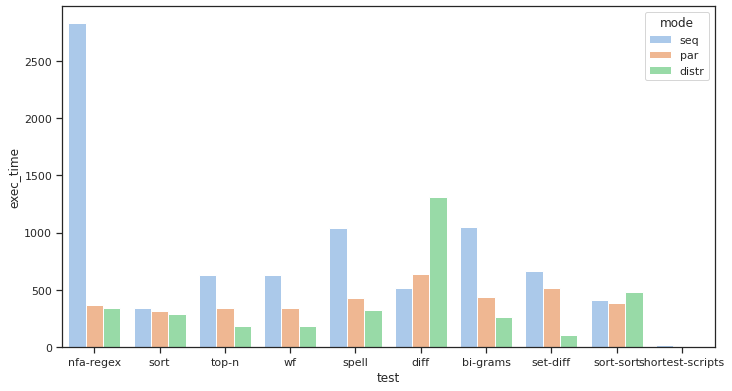

In [26]:
sns.barplot(data=summary, x='test', y='exec_time', hue = 'mode')

Average speedup over bash:  3.4354231887866256
Max speedup over bash:  8.170693652954341
Min speedup over bash:  0.39666961591341277


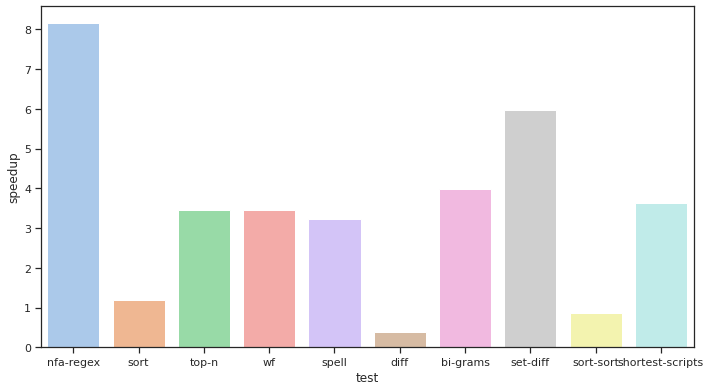

In [61]:
seq_df, par_df, distr_df = dfs

distr_speedup_over_bash = pd.DataFrame(
    {
        'test': seq_df['test'],
        'speedup': seq_df['exec_time']/distr_df['exec_time'],
        'mode' : distr_df['mode']
    }
)

print("Average speedup over bash: ", distr_speedup_over_bash['speedup'].mean())
print("Max speedup over bash: ", distr_speedup_over_bash['speedup'].max())
print("Min speedup over bash: ", distr_speedup_over_bash['speedup'].min())
sns.barplot(data=distr_speedup_over_bash, x='test', y='speedup')
plt.savefig('distr_speedup_over_bash.pdf')

Average speedup over bash:  2.2864242744103453
Max speedup over bash:  7.759898657901944
Max speedup over bash:  0.8084530709090203


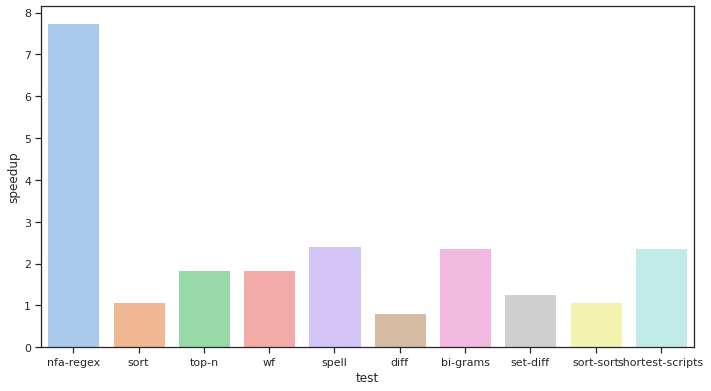

In [60]:
par_speedup_over_bash = pd.DataFrame(
    {
        'test': seq_df['test'],
        'speedup': seq_df['exec_time']/par_df['exec_time'],
        'mode' : par_df['mode']
    }
)

print("Average speedup over bash: ", par_speedup_over_bash['speedup'].mean())
print("Max speedup over bash: ", par_speedup_over_bash['speedup'].max())
print("Max speedup over bash: ", par_speedup_over_bash['speedup'].min())
sns.barplot(data=par_speedup_over_bash, x='test', y='speedup')
plt.savefig('par_speedup_over_bash.pdf')

Average speedup over pash:  1.6399342427798835
Max speedup over pash:  4.65844451617531


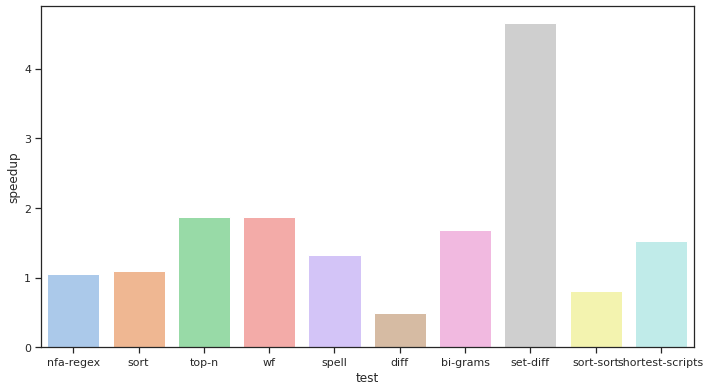

In [59]:
distr_speedup_over_par = pd.DataFrame(
    {
        'test': seq_df['test'],
        'speedup': par_df['exec_time']/distr_df['exec_time'],
        'mode' : distr_df['mode']
    }
)

print("Average speedup over pash: ", distr_speedup_over_par['speedup'].mean())
print("Max speedup over pash: ", distr_speedup_over_par['speedup'].max())
sns.barplot(data=distr_speedup_over_par, x='test', y='speedup')
plt.savefig('distr_speedup_over_par.pdf')

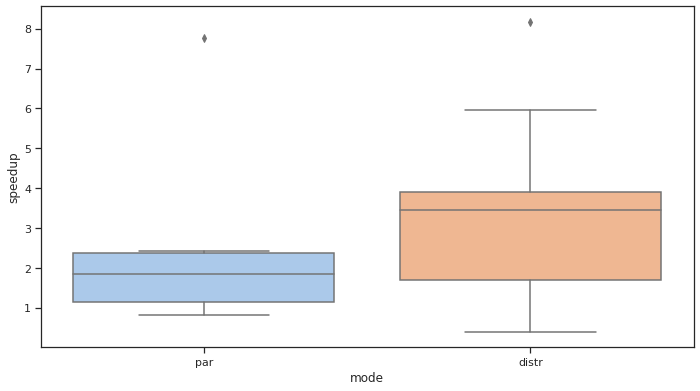

In [58]:
summary_speedup = pd.concat([par_speedup_over_bash, distr_speedup_over_bash])
sns.boxplot(data=summary_speedup, x='mode', y = 'speedup')
plt.savefig('distr_barplot.pdf')